In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
from scipy.io.arff import loadarff
import os

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = "C:/Users/renato.aranha/Desktop/MMD/datasets/gun_crime_data.csv"

In [7]:
table = pd.read_csv(datapath)
print(table)
table.info()

      year       pop     ampct    metpct  unrate    prison  totemployed  \
0   2013.0  316500.0  0.129000  0.810000     7.4  4077.436     136394.0   
1   2012.0  314110.0  0.128000  0.810000     8.1  4065.240     134098.0   
2   2011.0  311720.0  0.127000  0.810000     8.9  4139.755     131843.0   
3   2010.0  310232.8  0.127000  0.810000     9.6  4177.352     130269.0   
4   2009.0  307006.5  0.126000  0.810000     9.3  4232.373     131220.0   
5   2008.0  304374.8  0.126000  0.800000     5.8  4223.925     137169.0   
6   2007.0  301579.8  0.126000  0.800000     4.6  4215.494     137935.0   
7   2006.0  298593.2  0.125000  0.800000     4.6  4157.292     136403.0   
8   2005.0  295753.1  0.125000  0.800000     5.1  4044.058     133996.0   
9   2004.0  293045.7  0.125000  0.800000     5.5  3937.739     131732.0   
10  2003.0  290809.8  0.125000  0.800000     6.0  3864.317     130315.0   
11  2002.0  287973.9  0.125000  0.790000     5.8  3830.036     130628.0   
12  2001.0  284796.9  0.1

In [5]:
table2 = table.copy()
table2.describe()

,year,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,15.000000,1.500000e+01,1.500000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1996.500000,270009.473529,0.123407,0.774391,6.464706,3187.431294,117725.882353,0.434717,6.619693,26996.470588,...,1878.995559,466437.933333,1.573333e+06,1.011130e+06,22.039521,38.798810,1744.931444,15.062189,28.782477,22.050905
std,9.958246,28490.133856,0.003667,0.026215,1.646094,993.798203,16290.615050,0.023482,1.874357,3247.483989,...,350.543655,71868.117600,2.631313e+05,1.018971e+05,3.326157,9.115436,566.228123,1.889766,4.041572,2.936961
min,1980.000000,226549.000000,0.116950,0.737377,4.000000,1262.872000,89684.000000,0.386197,4.731749,21160.000000,...,1290.995000,378380.000000,1.200000e+06,9.133610e+05,14.116490,16.970000,977.507100,12.160000,20.000000,18.885410
25%,1988.250000,245076.500000,0.119862,0.747859,5.325000,2316.709000,106043.000000,0.421834,5.058792,24730.000000,...,1596.064250,417363.500000,1.400000e+06,9.276400e+05,20.077780,33.786507,1235.054500,14.400000,28.061745,19.266530
50%,1996.500000,266506.100000,0.125000,0.775629,6.050000,3681.778500,121384.500000,0.434374,5.527817,27783.500000,...,1847.058500,452473.000000,1.500000e+06,9.676780e+05,21.880000,40.130160,1604.922000,14.950000,30.067925,21.400000
75%,2004.750000,295076.250000,0.126009,0.800000,7.475000,4028.912750,131815.250000,0.452747,8.870906,29946.000000,...,2079.867500,477474.500000,1.750000e+06,1.100000e+06,23.443008,43.790320,2251.267500,15.593460,31.721058,24.855000
max,2013.000000,316500.000000,0.129000,0.810000,9.700000,4232.373000,137935.000000,0.473943,9.267693,30943.000000,...,2624.043000,607971.000000,2.200000e+06,1.200000e+06,31.320000,61.510000,2732.196000,19.342620,32.995590,26.760000


In [295]:
table2 = table2[table2.year >= 0]
table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 33 columns):
year                       34 non-null float64
pop                        34 non-null float64
ampct                      34 non-null float64
metpct                     34 non-null float64
unrate                     34 non-null float64
prison                     34 non-null float64
totemployed                34 non-null float64
employ                     34 non-null float64
military                   34 non-null float64
rpci                       34 non-null float64
domestic_gun_production    28 non-null float64
gallup_owngun              24 non-null float64
pgs                        34 non-null float64
totmajor                   34 non-null float64
murder                     34 non-null float64
rape                       34 non-null float64
robbery                    34 non-null float64
assault                    34 non-null float64
burglary                   34 non-null float64
hg  

In [8]:
table2['year'] = table2.year.map(int)
table2.totemployed = table2.totemployed.map(int)
table2.totmajor = table2.totmajor.map(int)

ValueError: cannot convert float NaN to integer

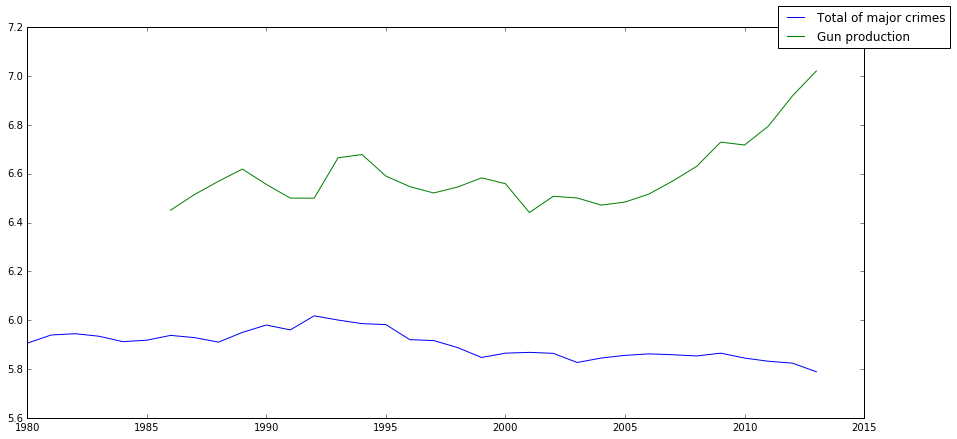

In [24]:
plt.figure(figsize=(15,7))
plt.plot(table2.year, log10(table2.totmajor))
plt.plot(table2.year, log10(table2.domestic_gun_production))
plt.legend(['Total of major crimes','Gun production'], loc = 10, bbox_to_anchor=(1,1))
plt.show()
#Enquanto o total dos principais crimes reduz com o tempo, a produção de armas aumenta substancialmente.
#A relação entre ambos parece não ser nítida ou não existe relação

In [25]:
table2[['totmajor','domestic_gun_production']].corr(method='pearson')
#Pelos dados obtidos, a correlação entre ambos é negativa

,totmajor,domestic_gun_production
totmajor,1.000000,-0.366179
domestic_gun_production,-0.366179,1.000000


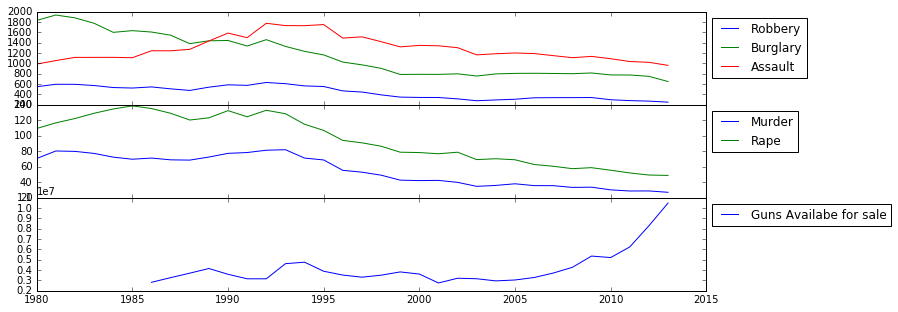

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,5))
ax1.plot(table2.year, table2.robbery)
ax1.plot(table2.year, table2.burglary)
ax1.plot(table2.year, table2.assault)
ax1.legend(['Robbery','Burglary','Assault'],bbox_to_anchor=(1, 1), loc=2)
ax2.plot(table2.year, table2.murder)
ax2.plot(table2.year, table2.rape)
ax2.legend(['Murder','Rape'],bbox_to_anchor=(1, 1), loc=2)
ax3.plot(table2.year, table2.domestic_gun_production)
ax3.legend(['Guns Availabe for sale'],bbox_to_anchor=(1, 1), loc=2)
f.subplots_adjust(hspace=0)
plt.show()
#Não há uma relação forte entre aumento/redução de determinados crimes com o aumento/redução da venda de armas

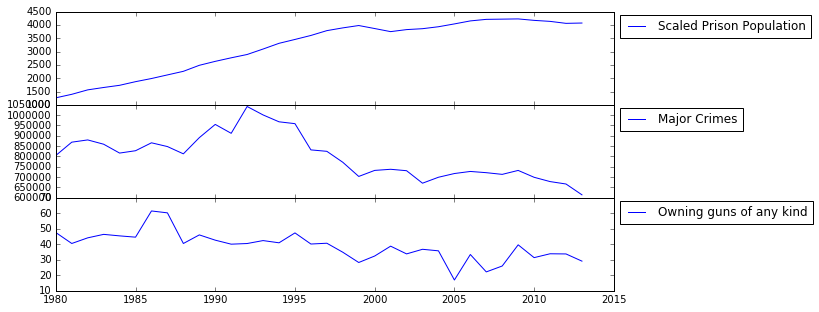

In [300]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,5))
ax1.plot(table2.year, table2.prison)
ax1.legend(['Scaled Prison Population'], loc = 2,bbox_to_anchor=(1,1.03))
ax2.plot(table2.year, table2.totmajor)
ax2.legend(['Major Crimes'], loc = 2,bbox_to_anchor=(1,1.03))
ax3.plot(table2.year, table2.pgun)
ax3.legend(['Owning guns of any kind'], loc = 2, bbox_to_anchor=(1,1.03))
f.subplots_adjust(hspace=0)
plt.show()

#Não há uma relação aparente entre as 3 séries de dados.

In [46]:
print("Correlação de Spearman")
print(table2[['totmajor','prison']].corr(method='spearman'))
print("----------------------------")
print("Correlação de Pearson")
print(table2[['totmajor','prison']].corr(method='pearson'))
print("----------------------------")
print("Correlação de Kendall")
print(table2[['totmajor','prison']].corr(method='kendall'))

#As correlações em todos os métodos são negativas. Ou seja, com esses dados, não há relação entre a quantidade dos 
#principais crimes e o quantidade de detentos

Correlação de Spearman
          totmajor    prison
totmajor  1.000000 -0.709396
prison   -0.709396  1.000000
----------------------------
Correlação de Pearson
          totmajor    prison
totmajor  1.000000 -0.573382
prison   -0.573382  1.000000
----------------------------
Correlação de Kendall
          totmajor    prison
totmajor  1.000000 -0.454545
prison   -0.454545  1.000000


In [67]:
df_totmajor = [(table2.totmajor[x]-table2.totmajor[x+1])/table2.totmajor[x+1]*100 for x in range(len(table2.totmajor)-1)]
df_totmajor.append(0)
table2['df_totmajor'] = df_totmajor
#Variação da quantidade dos principais crimes
table2.head()

,year,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,...,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564,df_totmajor,df_prison,df_domestic_gun
0,2013.0,316500.0,0.129,0.81,7.4,4077.436,136394.0,0.430945,4.739336,30518.0,...,925238.0,23.91000,29.14000,977.5071,12.16,20.0,26.76,-7.849128,0.300007,26.542035
1,2012.0,314110.0,0.128,0.81,8.1,4065.240,134098.0,0.426914,4.937761,29161.0,...,915060.0,22.75591,33.77953,1100.7190,12.16,20.0,26.76,-1.731731,-1.799986,32.763149
2,2011.0,311720.0,0.127,0.81,8.9,4139.755,131843.0,0.422953,5.078275,29005.0,...,1000000.0,21.18000,33.89000,1138.5090,12.16,20.0,26.76,-2.967275,-0.900020,19.698739
3,2010.0,310232.8,0.127,0.81,9.6,4177.352,130269.0,0.419907,5.163864,28838.0,...,1100000.0,19.54211,31.39820,1162.0530,12.16,20.0,26.76,-4.533707,-1.300004,-2.682504
4,2009.0,307006.5,0.126,0.81,9.3,4232.373,131220.0,0.427418,5.182301,29274.0,...,954901.0,20.78000,39.66000,1249.1490,12.40,22.0,26.20,2.676573,0.200004,25.538678


In [48]:
table2[['df_totmajor','pgun']].corr(method='pearson')

#Há uma correlação positiva fraca entre a variação dos principais crimes com a porcentagem de armas por casa

,df_totmajor,pgun
df_totmajor,1.000000,0.175943
pgun,0.175943,1.000000


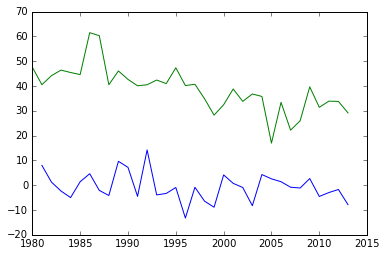

In [49]:
plt.plot(table2.year, table2.df_totmajor)
plt.plot(table2.year, table2.pgun)
plt.show()

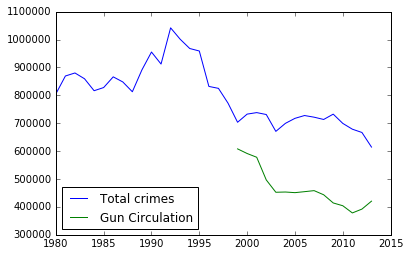

In [50]:
plt.plot(table2.year, table2.totmajor)
plt.plot(table2.year, table2.gunsamm)
plt.legend(['Total crimes','Gun Circulation'], loc=3)
plt.show()

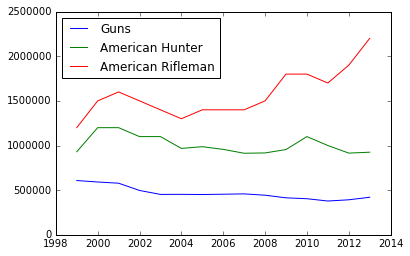

In [53]:
plt.plot(table2.year[table2.gunsamm !=0], table2.gunsamm[table2.gunsamm !=0])
plt.plot(table2.year[table2.gunsamm !=0], table2.amhms[table2.gunsamm !=0])
plt.plot(table2.year[table2.gunsamm !=0], table2.amrmms[table2.gunsamm !=0])
plt.legend(['Guns','American Hunter','American Rifleman'], loc=2)
plt.show()

#Não há aumentos visíveis na produção de armas quando há um aumento na comercialização de revistas especializadas no
#assunto

In [54]:
df_prison = [(table2.prison[x]-table2.prison[x+1])/table2.prison[x+1]*100 for x in range(len(table2.prison)-1)]
df_prison.append(0)
table2['df_prison'] = df_prison

#Criei uma coluna com a variação da população carcerária dimensionada

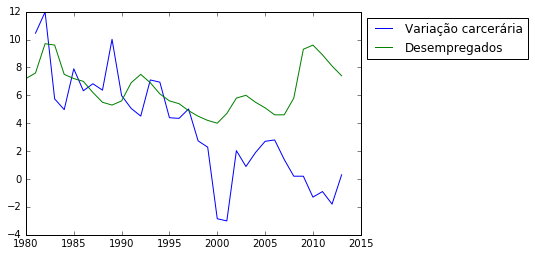

In [55]:
plt.plot(table2.year, table2.df_prison)
plt.plot(table2.year, table2.unrate)
plt.legend(['Variação carcerária','Desempregados'],loc=2,bbox_to_anchor=(1,1))
plt.show()

In [56]:
table2[['df_prison','unrate']].corr()

,df_prison,unrate
df_prison,1.000000,0.149738
unrate,0.149738,1.000000


In [57]:
df_domestic_gun = [((table2.domestic_gun_production[x]-table2.domestic_gun_production[x+1])/table2.domestic_gun_production[x+1])*100 for x in range(len(table2.domestic_gun_production)-1)]
df_domestic_gun.append(0)
table2['df_domestic_gun'] = df_domestic_gun
#Variação na produção de armas

In [58]:
table2[['df_domestic_gun','df_totmajor']].corr()

,df_domestic_gun,df_totmajor
df_domestic_gun,1.000000,-0.130218
df_totmajor,-0.130218,1.000000


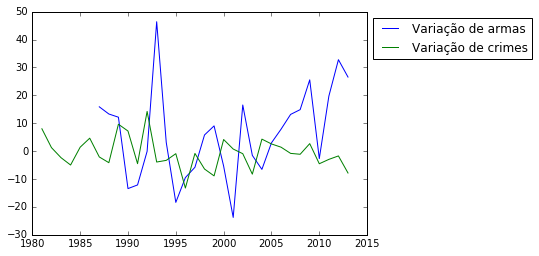

In [59]:
plt.plot(table2.year, table2.df_domestic_gun)
plt.plot(table2.year, table2.df_totmajor)
plt.legend(['Variação de armas','Variação de crimes'], loc=2, bbox_to_anchor =(1,1))
plt.show()

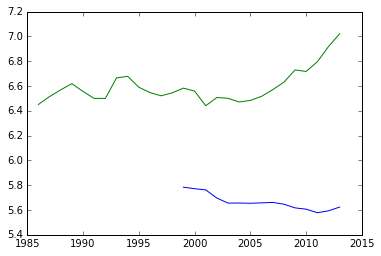

In [60]:
plt.plot(table2.year, log10(table2.gunsamm))
plt.plot(table2.year, log10(table2.domestic_gun_production))
plt.show()
#Aumento de armas disponíveis para venda, porém, diminuição na circulação de armas e munições

In [61]:
idades = pd.DataFrame(table2.r1524)
idades[['r2544','r4564']] = table2[['r2544','r4564']]

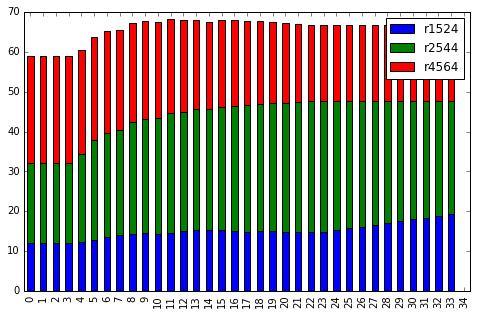

In [62]:
idades.plot.bar(stacked=True, figsize=(8,5))
plt.plot()
plt.show()

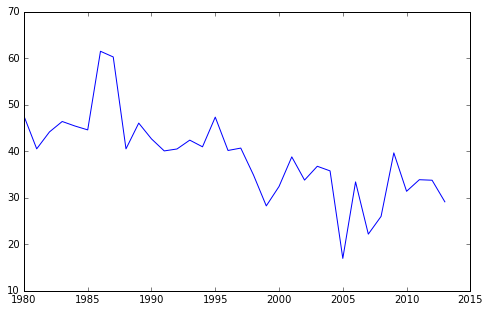

In [63]:
plt.figure(figsize=(8,5))
plt.plot(table2.year, table2.pgun)
plt.show()